Random Forest

Accuracy: 0.9987423460961915
Mean Squared Error: 0.0012576539038085318
Mean Absolute Error: 0.0012576539038085318


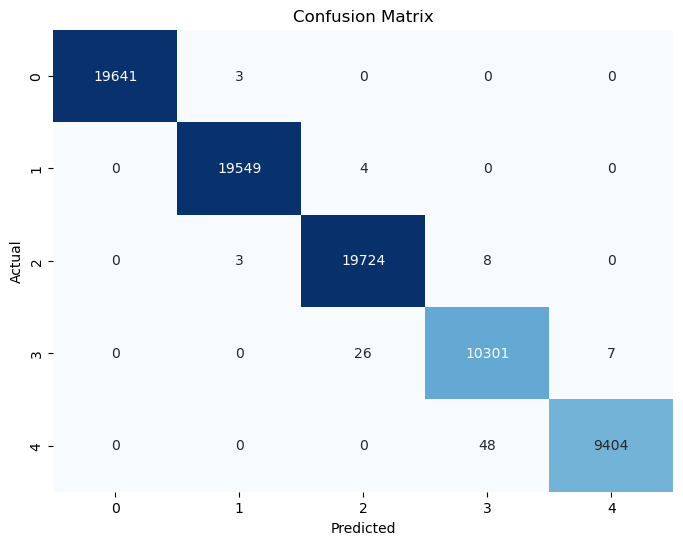

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19644
           1       1.00      1.00      1.00     19553
           2       1.00      1.00      1.00     19735
           3       0.99      1.00      1.00     10334
           4       1.00      0.99      1.00      9452

    accuracy                           1.00     78718
   macro avg       1.00      1.00      1.00     78718
weighted avg       1.00      1.00      1.00     78718



In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


df = pd.read_csv('final_processed_traffic_data_final.csv')






X = df.drop('congestion_level_encoded', axis=1)  
y = df['congestion_level_encoded']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)






rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [12]:



mae_rf = mean_absolute_error(y_test, y_pred)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)


Random Forest MAE: 0.0012576539038085318
Random Forest RMSE: 0.035463416414786265


In [6]:
import pickle


with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)




Epoch 1/10


4920/4920 [==============================] - 30s 6ms/step - loss: 0.2309 - accuracy: 0.9083 - val_loss: 0.1120 - val_accuracy: 0.9538
Epoch 2/10
4920/4920 [==============================] - 27s 5ms/step - loss: 0.1028 - accuracy: 0.9576 - val_loss: 0.0905 - val_accuracy: 0.9620
Epoch 3/10
4920/4920 [==============================] - 27s 6ms/step - loss: 0.0884 - accuracy: 0.9629 - val_loss: 0.0797 - val_accuracy: 0.9660
Epoch 4/10
4920/4920 [==============================] - 27s 6ms/step - loss: 0.0791 - accuracy: 0.9666 - val_loss: 0.0788 - val_accuracy: 0.9677
Epoch 5/10
4920/4920 [==============================] - 26s 5ms/step - loss: 0.0734 - accuracy: 0.9689 - val_loss: 0.0676 - val_accuracy: 0.9713
Epoch 6/10
4920/4920 [==============================] - 26s 5ms/step - loss: 0.0694 - accuracy: 0.9709 - val_loss: 0.0653 - val_accuracy: 0.9728
Epoch 7/10
4920/4920 [==============================] - 26s 5ms/step - loss: 0.0652 - accuracy: 0.9722 - val_loss: 0.0773 - v

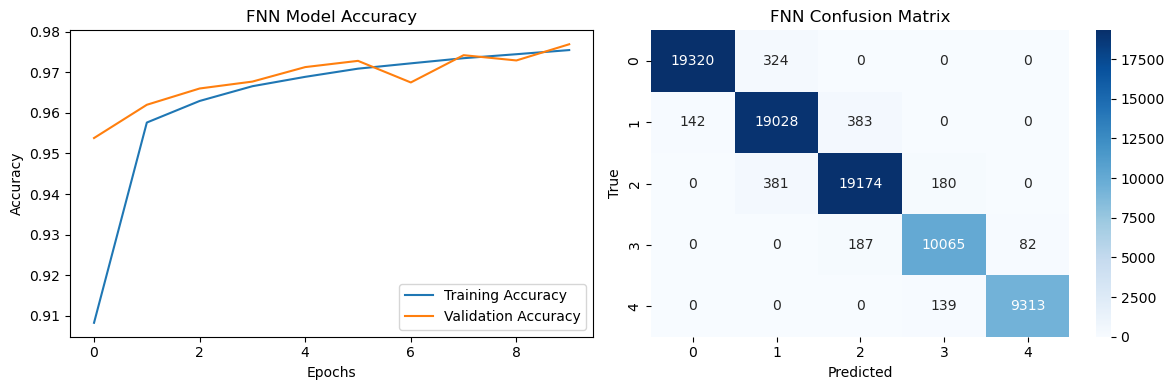

2460/2460 [==============================] - 13s 5ms/step

RNN Model Accuracy: 0.9779338836669922
RNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     19644
           1       0.97      0.97      0.97     19553
           2       0.97      0.98      0.97     19735
           3       0.98      0.98      0.98     10334
           4       0.99      0.99      0.99      9452

    accuracy                           0.98     78718
   macro avg       0.98      0.98      0.98     78718
weighted avg       0.98      0.98      0.98     78718



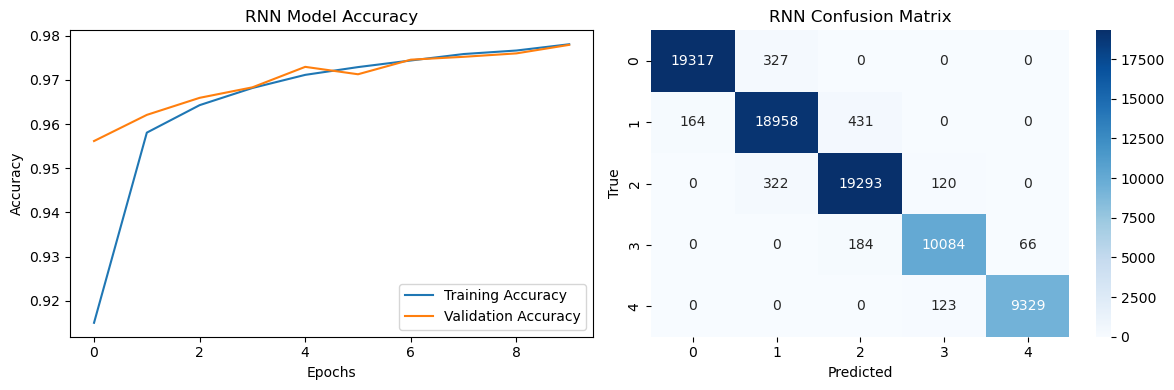

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns


df = pd.read_csv('final_processed_traffic_data_final.csv')


X = df.drop('congestion_level_encoded', axis=1)  
y = df['congestion_level_encoded']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


X_test = scaler.transform(X_test)

# FNN model
fnn_model = Sequential()
fnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dense(5, activation='softmax'))


fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# FNN model
fnn_history = fnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])))
rnn_model.add(LSTM(32))
rnn_model.add(Dense(5, activation='softmax'))


rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_rnn, y_test))



# Evaluating the the FNN model
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_test, y_test)
fnn_predictions = fnn_model.predict(X_test)
fnn_predicted_classes = np.argmax(fnn_predictions, axis=1)
fnn_classification_report = classification_report(y_test, fnn_predicted_classes)
fnn_confusion_matrix = confusion_matrix(y_test, fnn_predicted_classes)




print("FNN Model Accuracy:", fnn_accuracy)
print("FNN Model Classification Report:\n", fnn_classification_report)

#  FNN training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
sns.heatmap(fnn_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('FNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Evaluating  the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
rnn_predictions = rnn_model.predict(X_test_rnn)
rnn_predicted_classes = np.argmax(rnn_predictions, axis=1)
rnn_classification_report = classification_report(y_test, rnn_predicted_classes)
rnn_confusion_matrix = confusion_matrix(y_test, rnn_predicted_classes)


print("\nRNN Model Accuracy:", rnn_accuracy)
print("RNN Model Classification Report:\n", rnn_classification_report)

# RNN training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()


plt.subplot(1, 2, 2)
sns.heatmap(rnn_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('RNN Confusion Matrix')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For FNN
mae_fnn = mean_absolute_error(y_test, fnn_predicted_classes)
rmse_fnn = np.sqrt(mean_squared_error(y_test, fnn_predicted_classes))

print("FNN MAE:", mae_fnn)
print("FNN RMSE:", rmse_fnn)

# For RNN
mae_rnn = mean_absolute_error(y_test, rnn_predicted_classes)
rmse_rnn = np.sqrt(mean_squared_error(y_test, rnn_predicted_classes))

print("RNN MAE:", mae_rnn)
print("RNN RMSE:", rmse_rnn)

FNN MAE: 0.023095098960847583
FNN RMSE: 0.15197071744532756
RNN MAE: 0.022066109403186058
RNN RMSE: 0.14854665732754158


In [4]:
# Save the FNN model
fnn_model.save('fnn_model.h5')

# Save the RNN model
rnn_model.save('rnn_model.h5')

C:\Users\anzal\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


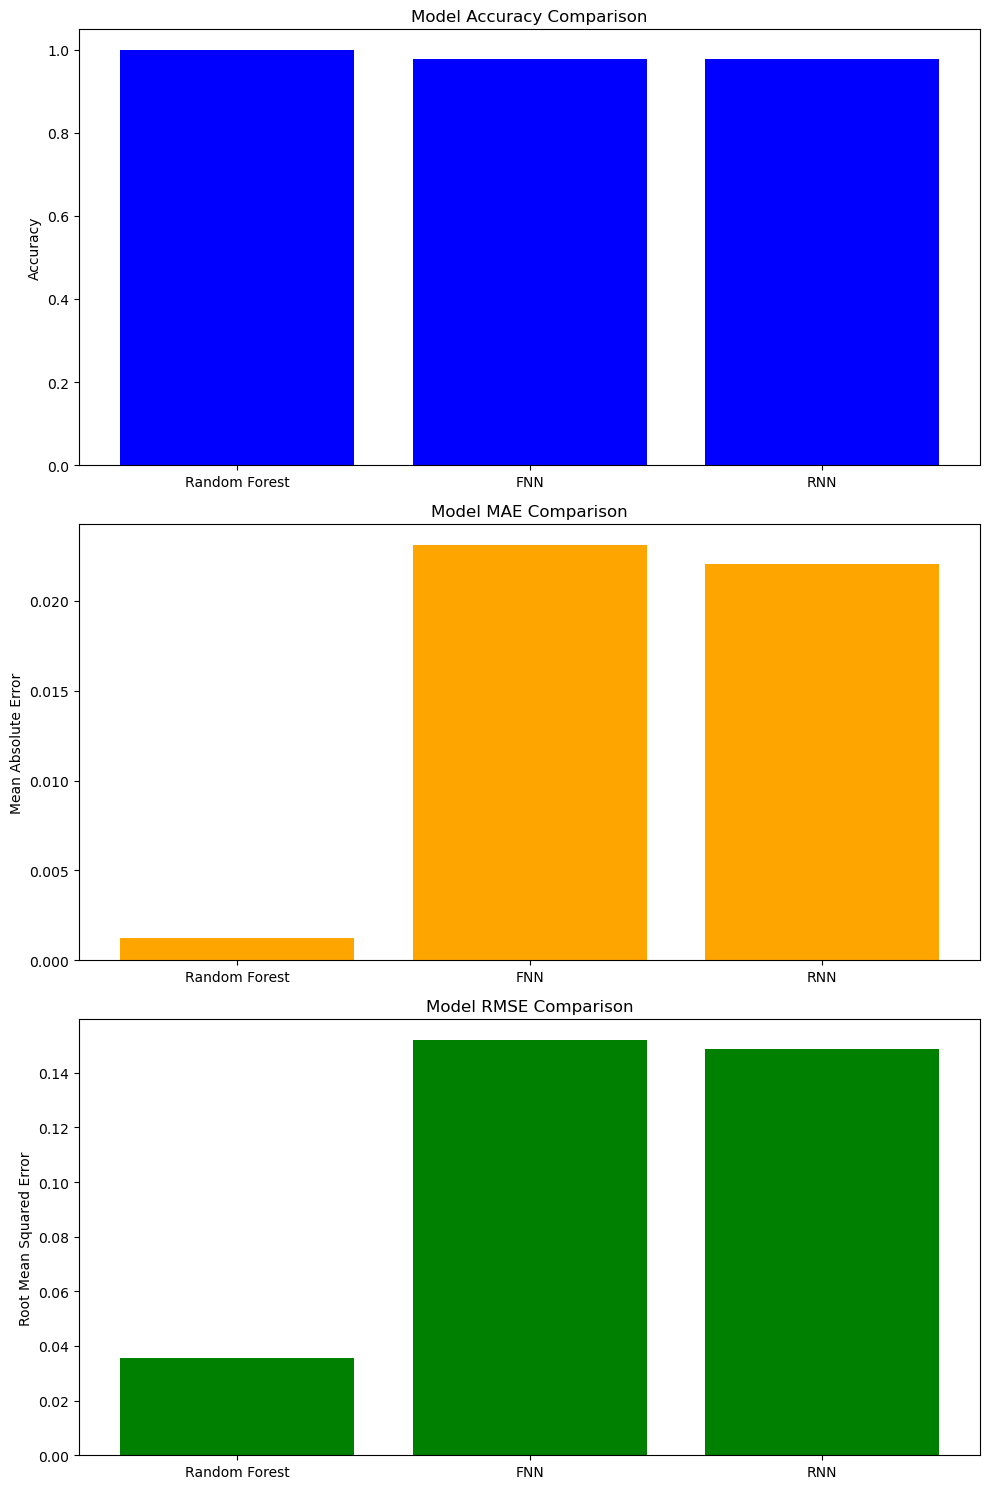

In [13]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'FNN', 'RNN']
acc_scores = [accuracy, fnn_accuracy, rnn_accuracy]  # Use your accuracy scores here
maes = [mae_rf, mae_fnn, mae_rnn]
rmses = [rmse_rf, rmse_fnn, rmse_rnn]


fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy Plot
ax[0].bar(models, acc_scores, color='blue')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_ylabel('Accuracy')

# MAE Plot
ax[1].bar(models, maes, color='orange')
ax[1].set_title('Model MAE Comparison')
ax[1].set_ylabel('Mean Absolute Error')

# RMSE Plot
ax[2].bar(models, rmses, color='green')
ax[2].set_title('Model RMSE Comparison')

ax[2].set_ylabel('Root Mean Squared Error')

plt.tight_layout()
plt.show()

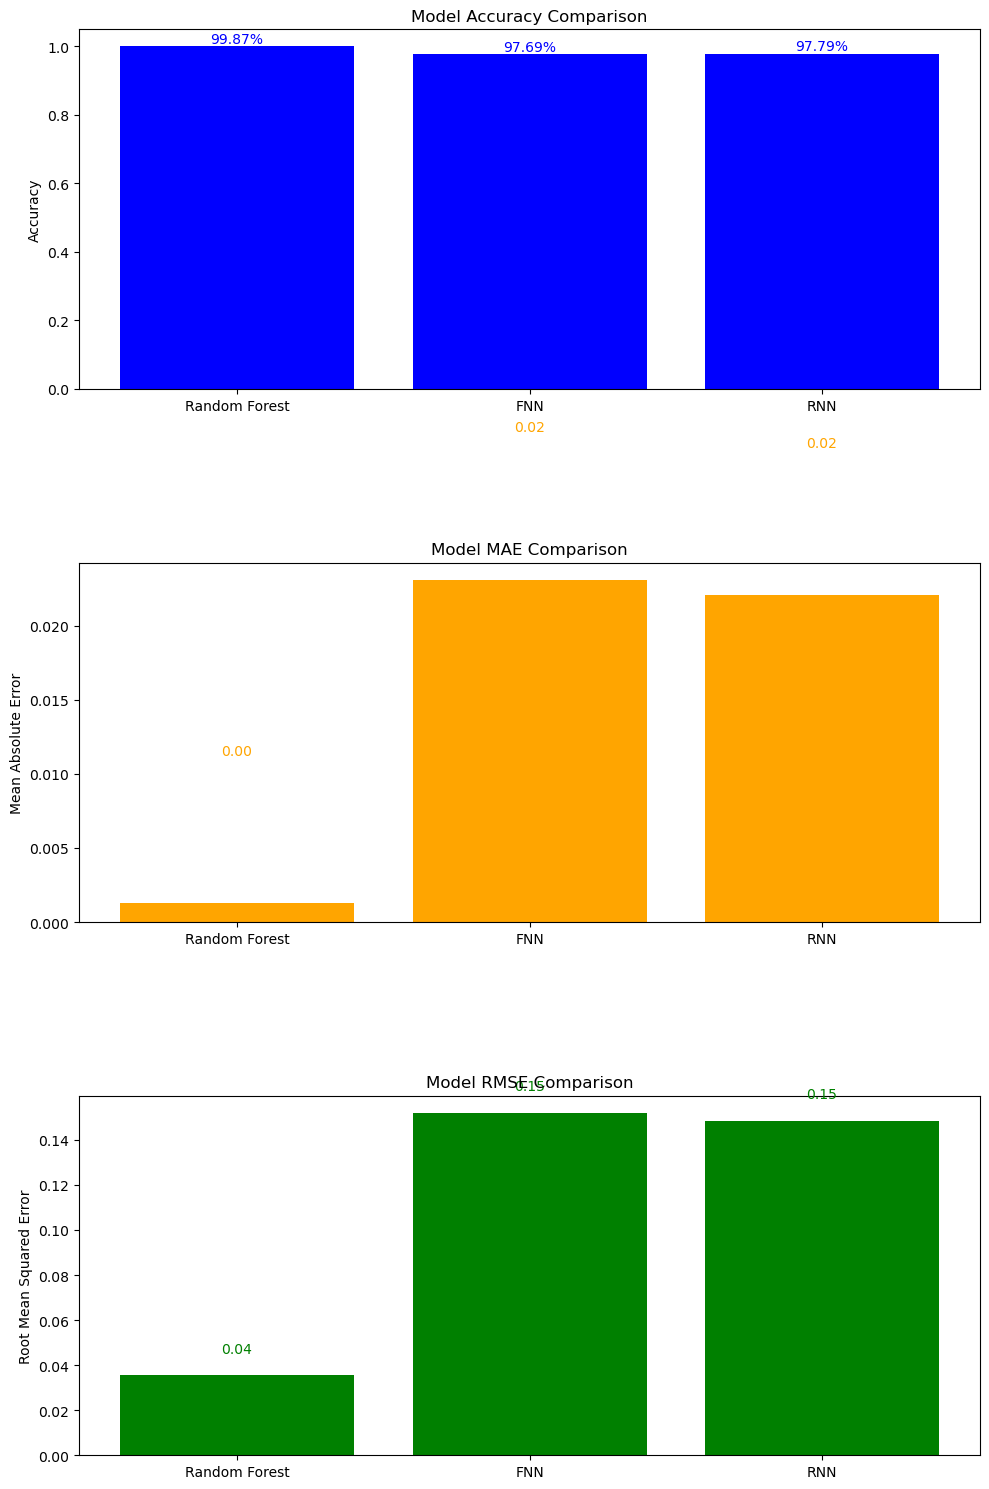

In [14]:
import matplotlib.pyplot as plt



models = ['Random Forest', 'FNN', 'RNN']
acc_scores = [accuracy, fnn_accuracy, rnn_accuracy]  # Use your accuracy scores here
maes = [mae_rf, mae_fnn, mae_rnn]
rmses = [rmse_rf, rmse_fnn, rmse_rnn]

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))


ax[0].bar(models, acc_scores, color='blue')
ax[0].set_title('Model Accuracy Comparison')


ax[0].set_ylabel('Accuracy')

for i, v in enumerate(acc_scores):
    ax[0].text(i, v + 0.01, f"{v:.2%}", ha='center', color='blue')

# MAE Plot
ax[1].bar(models, maes, color='orange')
ax[1].set_title('Model MAE Comparison')
ax[1].set_ylabel('Mean Absolute Error')

for i, v in enumerate(maes):
    ax[1].text(i, v + 0.01, f"{v:.2f}", ha='center', color='orange')

# RMSE Plot
ax[2].bar(models, rmses, color='green')
ax[2].set_title('Model RMSE Comparison')
ax[2].set_ylabel('Root Mean Squared Error')


for i, v in enumerate(rmses):
    ax[2].text(i, v + 0.01, f"{v:.2f}", ha='center', color='green')

plt.tight_layout()
plt.show()
